In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\python\\USA Mercedes Benz Prices\\usa_mercedes_benz_prices.csv")

In [3]:
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"


# Data pre-processing

### Creating new columns

In [4]:
df['year'] = df['Name'].str.split(' ').str[0]

In [5]:
df['model'] = df['Name'].str.split(' ').str[2]

In [6]:
df['specification'] = df['Name'].str.split(' ').str[3:].str.join(' ')

In [7]:
df.head()

,Name,Mileage,Rating,Review Count,Price,year,model,specification
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900",2021,A-Class,A 220 4MATIC
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999",2022,AMG,SL 63 Base
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999",2022,AMG,SL 63 Base
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587",2020,AMG,E 53 Base 4MATIC
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990",2021,AMG,GLS 63 Base 4MATIC


In [8]:
# droping the Name column as i have got the relevent data from it
df.drop(columns=['Name'],inplace=True)

In [9]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,"29,636 mi.",3.9,"1,800","$30,900",2021,A-Class,A 220 4MATIC
1,"5,540 mi.",4.7,"1,239","$139,999",2022,AMG,SL 63 Base
2,"4,890 mi.",4.7,"1,239","$132,999",2022,AMG,SL 63 Base
3,"29,746 mi.",4.8,752,"$58,587",2020,AMG,E 53 Base 4MATIC
4,"32,631 mi.",5.0,"1,502","$95,990",2021,AMG,GLS 63 Base 4MATIC


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mileage        2429 non-null   object 
 1   Rating         2135 non-null   float64
 2   Review Count   2398 non-null   object 
 3   Price          2429 non-null   object 
 4   year           2429 non-null   object 
 5   model          2429 non-null   object 
 6   specification  2429 non-null   object 
dtypes: float64(1), object(6)
memory usage: 133.0+ KB


In [11]:
df['Mileage'] = df['Mileage'].str.replace(',','')
df['Mileage'] = df['Mileage'].str.replace('mi.','')
df['Mileage'] = df['Mileage'].astype('float')

In [12]:
df['Review Count'] = df['Review Count'].str.replace(',','')
df['Review Count'] = df['Review Count'].astype('float')

In [13]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,29636.0,3.9,1800.0,"$30,900",2021,A-Class,A 220 4MATIC
1,5540.0,4.7,1239.0,"$139,999",2022,AMG,SL 63 Base
2,4890.0,4.7,1239.0,"$132,999",2022,AMG,SL 63 Base
3,29746.0,4.8,752.0,"$58,587",2020,AMG,E 53 Base 4MATIC
4,32631.0,5.0,1502.0,"$95,990",2021,AMG,GLS 63 Base 4MATIC


In [14]:
# Price column have null values as Not price
# i am filling them with np.nan and then i will fill the null values 

In [15]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].replace('Not Priced',np.nan)
df['Price'] = df['Price'].astype('float')

In [16]:
# filling the null values in price column

In [17]:
df['Price'].isna().sum()

1

In [18]:
# There is only one null value in the column so i will fill it with mean
df.fillna({'Price':df['Price'].mean()}, inplace = True)

In [19]:
df['year'] = df['year'].astype('float')

In [20]:
df.info()
# now all the columns have correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mileage        2429 non-null   float64
 1   Rating         2135 non-null   float64
 2   Review Count   2398 non-null   float64
 3   Price          2429 non-null   float64
 4   year           2429 non-null   float64
 5   model          2429 non-null   object 
 6   specification  2429 non-null   object 
dtypes: float64(5), object(2)
memory usage: 133.0+ KB


## Handling NULL values

In [21]:
df.isna().sum()

Mileage            0
Rating           294
Review Count      31
Price              0
year               0
model              0
specification      0
dtype: int64

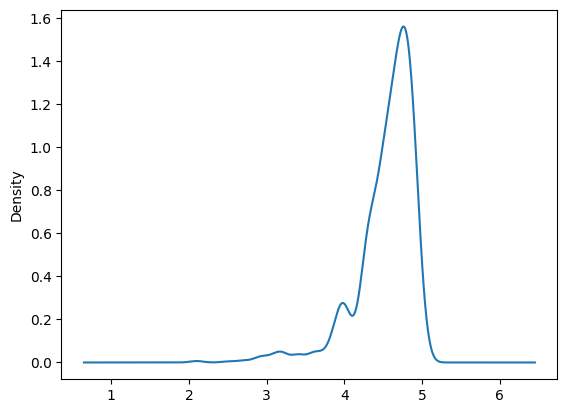

In [22]:
df['Rating'].plot(kind = 'kde')
plt.show()

In [23]:
df['Rating'].describe()

count    2135.000000
mean        4.533724
std         0.386506
min         2.100000
25%         4.400000
50%         4.600000
75%         4.800000
max         5.000000
Name: Rating, dtype: float64

In [24]:
# i am filling the null values in this columns with mean 
df.fillna({'Rating':df['Rating'].mean()}, inplace = True)

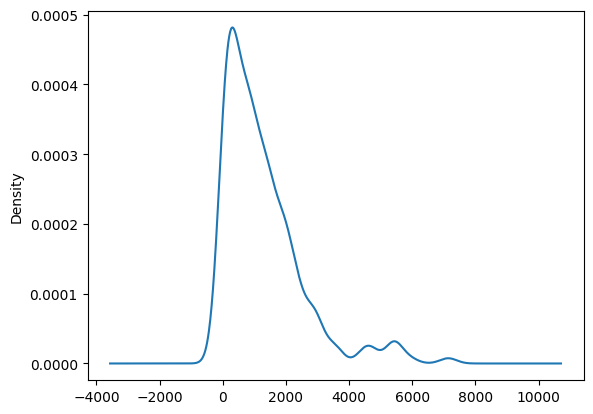

In [25]:
# filling NULL values in Review Count
df['Review Count'].plot(kind = 'kde')
plt.show()

In [26]:
df['Review Count'].describe()

count    2398.000000
mean     1267.143036
std      1261.300025
min         0.000000
25%       344.000000
50%       919.000000
75%      1800.000000
max      7140.000000
Name: Review Count, dtype: float64

In [27]:
# i am filling the values with mode of the data 
df.fillna({'Review Count':df['Review Count'].mode()[0]}, inplace = True)

In [28]:
df.isna().sum()
# sucessfully handled NULL values

Mileage          0
Rating           0
Review Count     0
Price            0
year             0
model            0
specification    0
dtype: int64

In [29]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,29636.0,3.9,1800.0,30900.0,2021.0,A-Class,A 220 4MATIC
1,5540.0,4.7,1239.0,139999.0,2022.0,AMG,SL 63 Base
2,4890.0,4.7,1239.0,132999.0,2022.0,AMG,SL 63 Base
3,29746.0,4.8,752.0,58587.0,2020.0,AMG,E 53 Base 4MATIC
4,32631.0,5.0,1502.0,95990.0,2021.0,AMG,GLS 63 Base 4MATIC


## Handling the Outliers

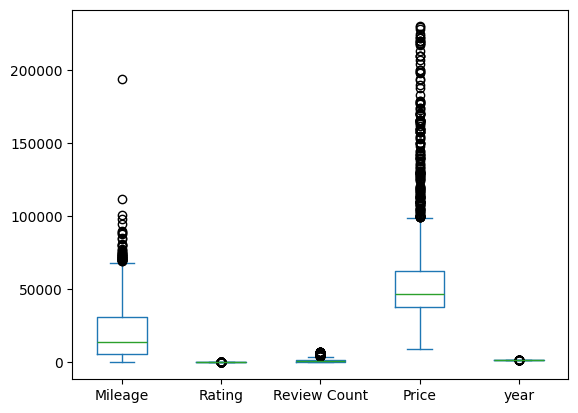

In [30]:
df.plot(kind = 'box')
plt.show()

#### The Target column that is price have too many outliers i will try to remove them using IQR method

In [31]:
df.shape

(2429, 7)

In [32]:
def remove_outliers(df):
    df_cleaned = df.copy()

    for col in df_cleaned.select_dtypes(include='number').columns:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        df_cleaned = df_cleaned[~outliers]
    
    return df_cleaned


In [33]:
df = remove_outliers(df)

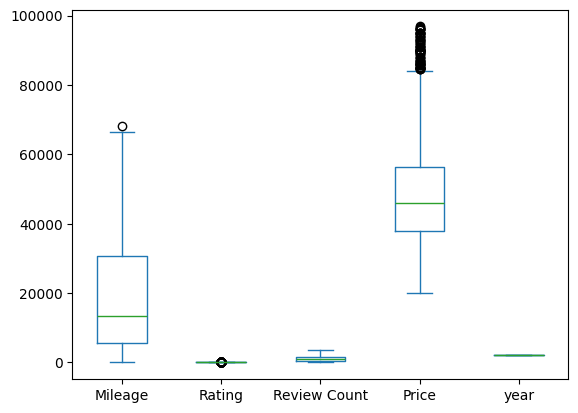

In [34]:
df.plot(kind = 'box')
plt.show()

In [35]:
df.shape

(1983, 7)

# EDA

In [36]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,29636.0,3.9,1800.0,30900.0,2021.0,A-Class,A 220 4MATIC
3,29746.0,4.8,752.0,58587.0,2020.0,AMG,E 53 Base 4MATIC
4,32631.0,5.0,1502.0,95990.0,2021.0,AMG,GLS 63 Base 4MATIC
5,3573.0,4.7,1239.0,74999.0,2022.0,AMG,E 53 Base 4MATIC
8,15755.0,4.8,902.0,71999.0,2021.0,AMG,GT C


In [37]:
df.Mileage.describe()

count     1983.000000
mean     19032.110943
std      15755.903626
min        100.000000
25%       5678.000000
50%      13446.000000
75%      30620.500000
max      68208.000000
Name: Mileage, dtype: float64

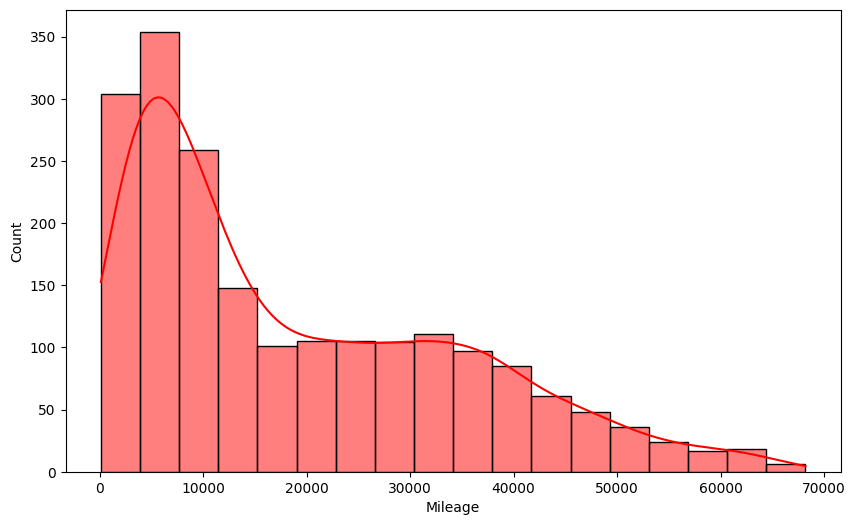

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['Mileage'],color='red',kde=True) 
plt.show()

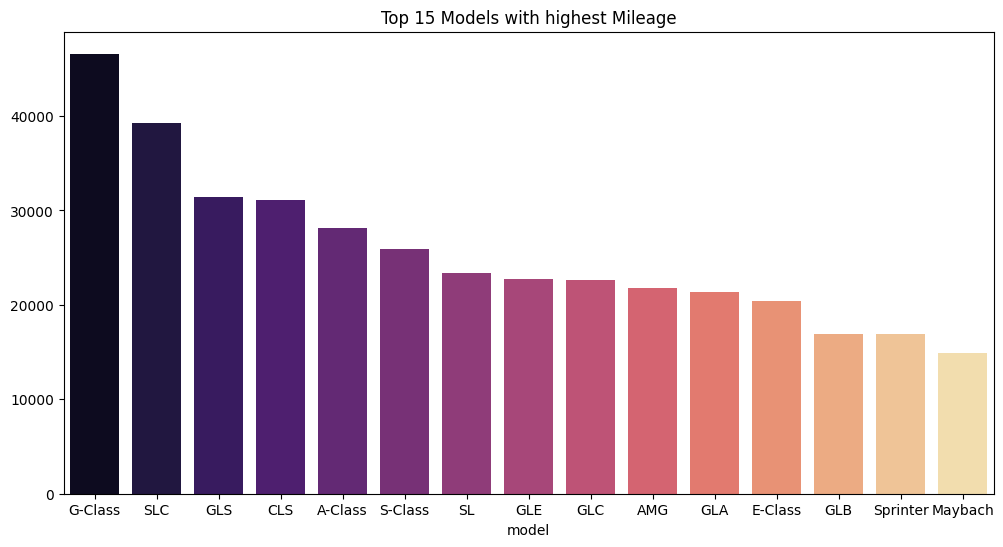

In [39]:
# model vs mileage 

mileage_by_model = df.groupby('model').Mileage.mean()
mileage_by_model = mileage_by_model.sort_values(ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(x=mileage_by_model.head(15).index, y=mileage_by_model.head(15).values, hue = mileage_by_model.head(15).index, palette='magma')
plt.title("Top 15 Models with highest Mileage")
plt.show()

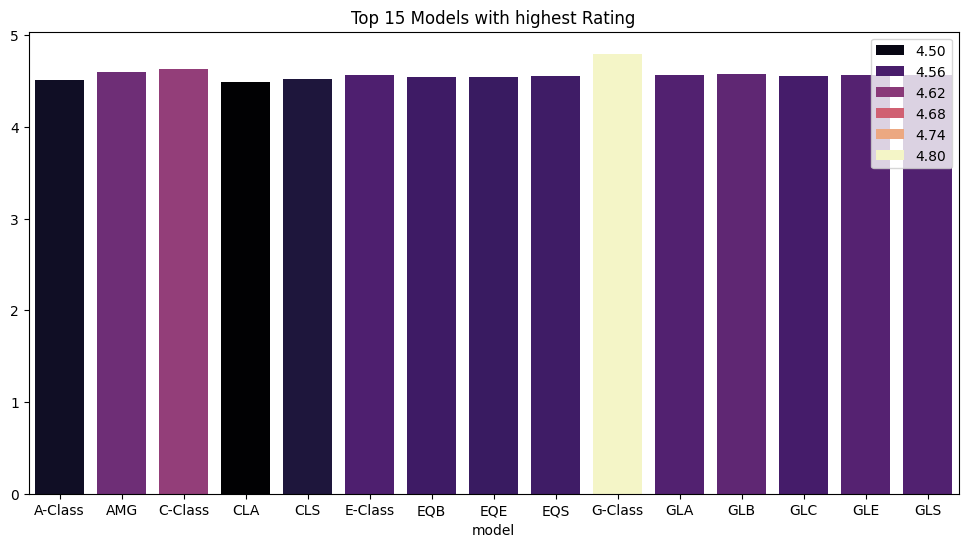

In [40]:
# Rating vs model 
rating_by_model = df.groupby('model').Rating.mean()

plt.figure(figsize=(12,6))
sns.barplot(x=rating_by_model.head(15).index, y=rating_by_model.head(15).values, hue = rating_by_model.head(15).values, palette='magma')
plt.title("Top 15 Models with highest Rating")
plt.show()
# All of the models have above 4.5 rating so this shows that mercedes is indeed a good brand 

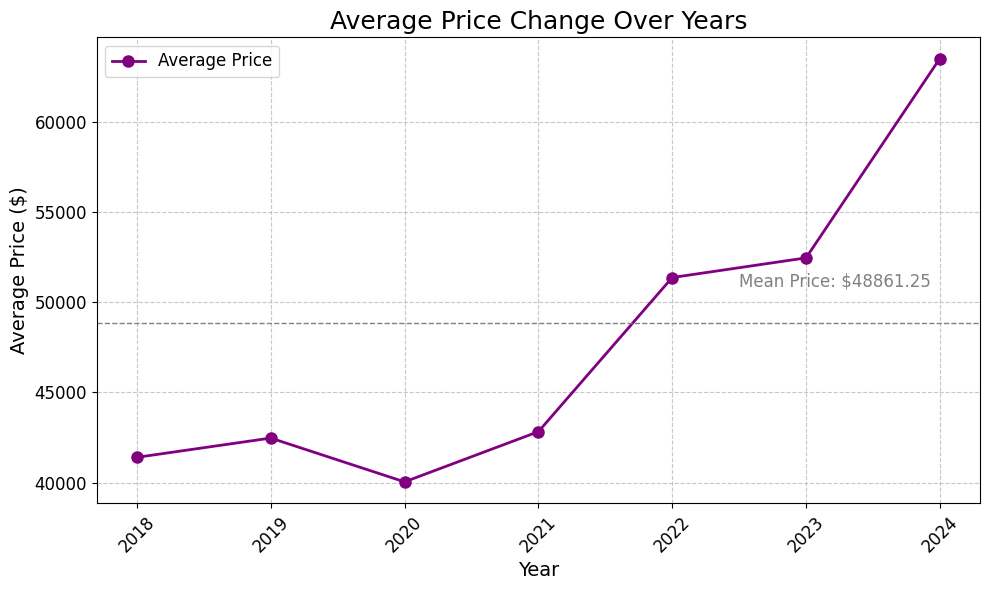

In [41]:
import matplotlib.pyplot as plt

# Aggregate data by taking the average price for each year
average_prices = df.groupby('year')['Price'].mean()

# Create the plot with style
plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-', color='purple', linewidth=2, markersize=8)

# Title and labels
plt.title('Average Price Change Over Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

mean_price = df['Price'].mean()
plt.axhline(mean_price, color='gray', linestyle='--', linewidth=1)

plt.text(2022.5, mean_price + 2000, f'Mean Price: ${mean_price:.2f}', fontsize=12, color='gray')

plt.legend(['Average Price'], loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [42]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,29636.0,3.9,1800.0,30900.0,2021.0,A-Class,A 220 4MATIC
3,29746.0,4.8,752.0,58587.0,2020.0,AMG,E 53 Base 4MATIC
4,32631.0,5.0,1502.0,95990.0,2021.0,AMG,GLS 63 Base 4MATIC
5,3573.0,4.7,1239.0,74999.0,2022.0,AMG,E 53 Base 4MATIC
8,15755.0,4.8,902.0,71999.0,2021.0,AMG,GT C


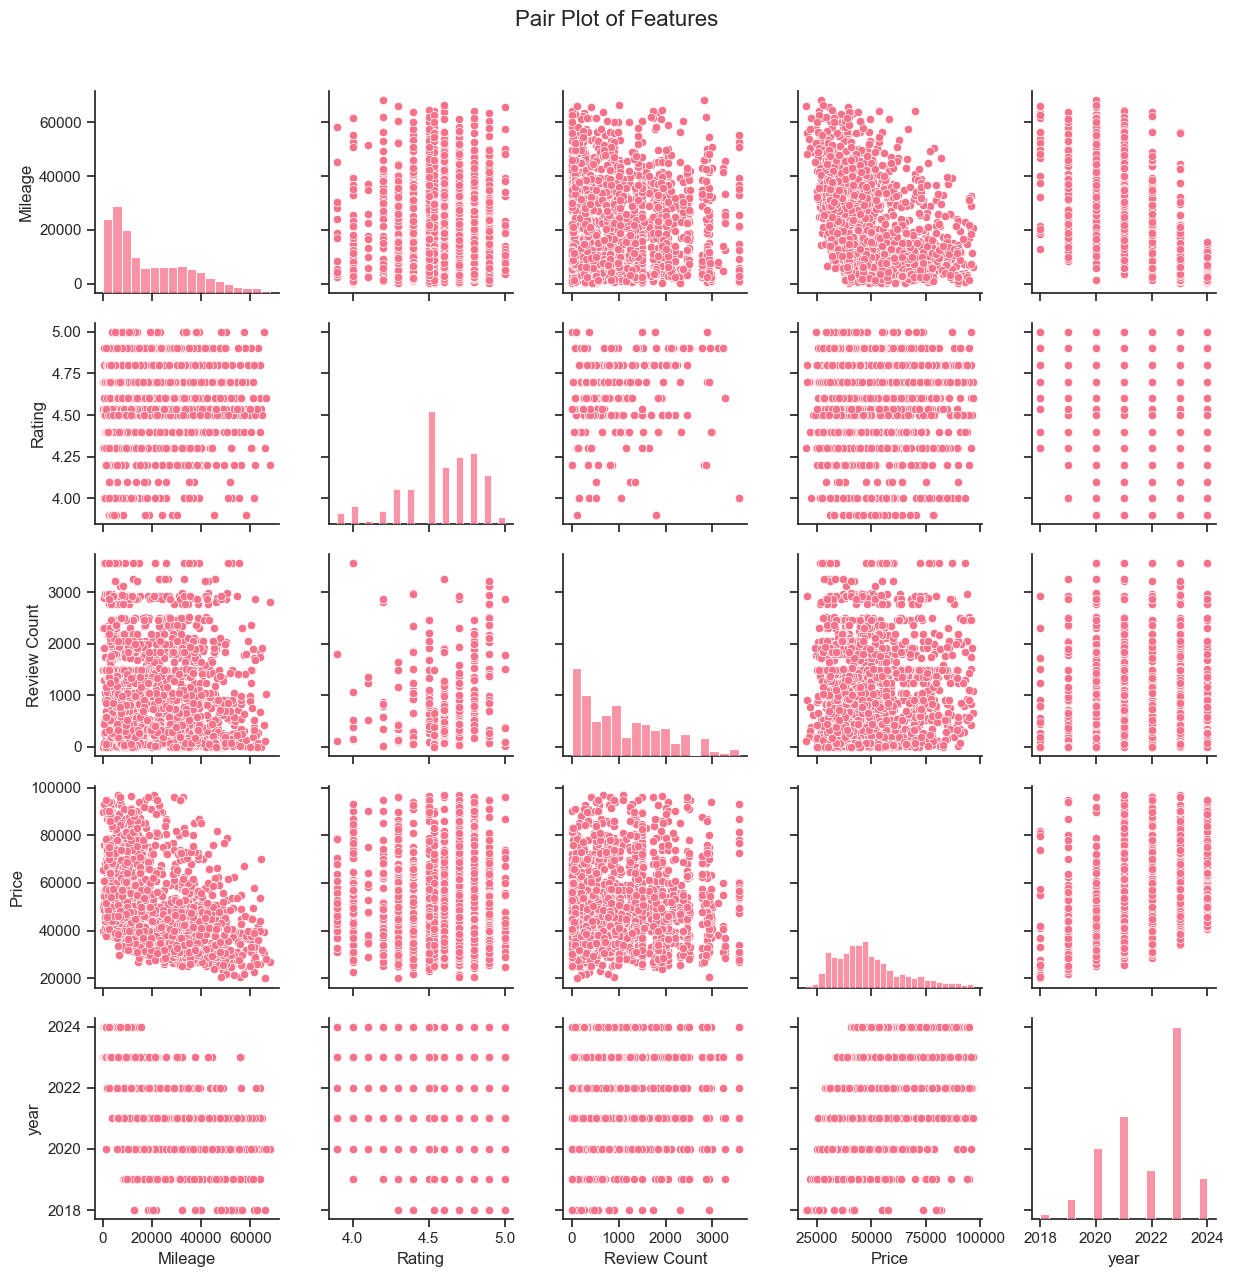

In [43]:
sns.set(style="ticks", palette="husl")
sns.pairplot(df, kind='scatter')
plt.suptitle('Pair Plot of Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

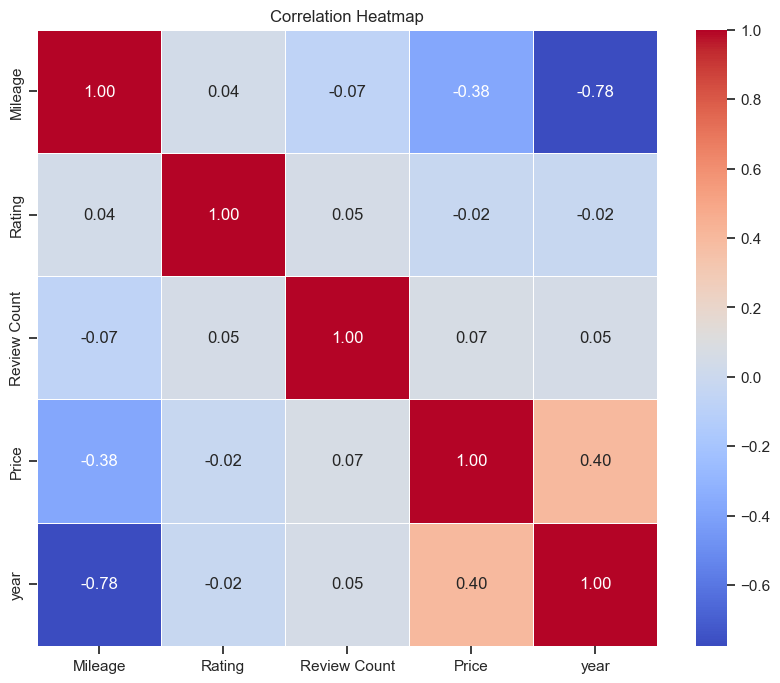

In [44]:
# heatmap
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes('float64')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap')
plt.show()

# Model building and evaluation

## Normalization

In [45]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,29636.0,3.9,1800.0,30900.0,2021.0,A-Class,A 220 4MATIC
3,29746.0,4.8,752.0,58587.0,2020.0,AMG,E 53 Base 4MATIC
4,32631.0,5.0,1502.0,95990.0,2021.0,AMG,GLS 63 Base 4MATIC
5,3573.0,4.7,1239.0,74999.0,2022.0,AMG,E 53 Base 4MATIC
8,15755.0,4.8,902.0,71999.0,2021.0,AMG,GT C


In [46]:
def normalize_columns(df, columns):
    for col in columns:
        # Min-max normalization: (x - min) / (max - min)
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)

columns_to_normalize = ['Mileage','Rating','Review Count','year']

normalize_columns(df, columns_to_normalize)

In [47]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,0.433664,0.000000,0.505192,30900.0,0.500000,A-Class,A 220 4MATIC
3,0.435279,0.818182,0.211058,58587.0,0.333333,AMG,E 53 Base 4MATIC
4,0.477638,1.000000,0.421555,95990.0,0.500000,AMG,GLS 63 Base 4MATIC
5,0.050993,0.727273,0.347741,74999.0,0.666667,AMG,E 53 Base 4MATIC
8,0.229856,0.818182,0.253157,71999.0,0.500000,AMG,GT C


In [48]:
# frequency encoding 

def frequency_encode(df, categorical_columns):
    for col in categorical_columns:
        encoding = df[col].value_counts(normalize=True)
        df[col] = df[col].map(encoding)

cols = ['model','specification']

frequency_encode(df,cols)

In [49]:
df.head()

,Mileage,Rating,Review Count,Price,year,model,specification
0,0.433664,0.000000,0.505192,30900.0,0.500000,0.022693,0.012103
3,0.435279,0.818182,0.211058,58587.0,0.333333,0.114473,0.009077
4,0.477638,1.000000,0.421555,95990.0,0.500000,0.114473,0.003026
5,0.050993,0.727273,0.347741,74999.0,0.666667,0.114473,0.009077
8,0.229856,0.818182,0.253157,71999.0,0.500000,0.114473,0.001513


Learning rate set to 0.044038
0:	learn: 15199.1045398	total: 1.11ms	remaining: 1.11s
1:	learn: 14908.2363924	total: 2.06ms	remaining: 1.03s
2:	learn: 14648.8218225	total: 2.98ms	remaining: 992ms
3:	learn: 14392.8354977	total: 3.94ms	remaining: 982ms
4:	learn: 14121.8476774	total: 4.84ms	remaining: 964ms
5:	learn: 13874.7849505	total: 5.79ms	remaining: 959ms
6:	learn: 13649.1645733	total: 6.73ms	remaining: 955ms
7:	learn: 13388.0374014	total: 7.67ms	remaining: 951ms
8:	learn: 13169.3883514	total: 8.4ms	remaining: 925ms
9:	learn: 12928.5118065	total: 9.31ms	remaining: 922ms
10:	learn: 12694.8242680	total: 10.2ms	remaining: 921ms
11:	learn: 12475.2337480	total: 11.2ms	remaining: 920ms
12:	learn: 12228.9985054	total: 12.1ms	remaining: 919ms
13:	learn: 11994.8067266	total: 13ms	remaining: 919ms
14:	learn: 11820.4057718	total: 14.3ms	remaining: 938ms
15:	learn: 11639.2532913	total: 15.3ms	remaining: 943ms
16:	learn: 11490.7650261	total: 16.4ms	remaining: 947ms
17:	learn: 11368.6565526	total:

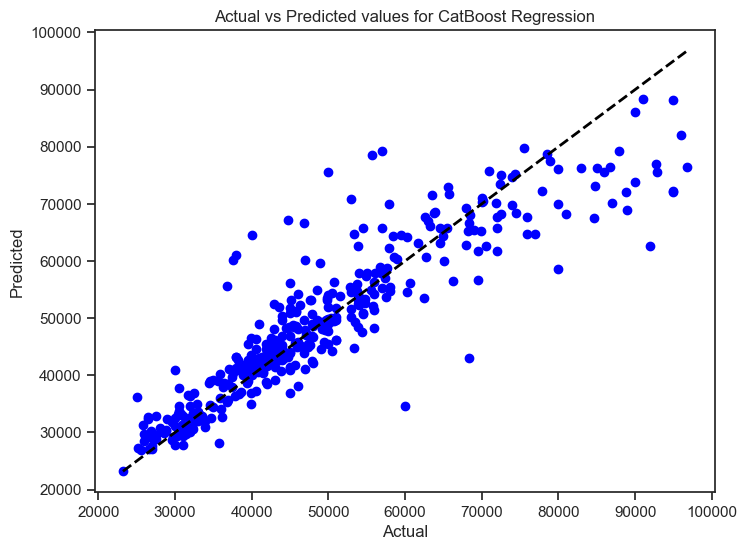

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CatBoost Regression Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values for CatBoost Regression')
plt.show()
